In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import roc_curve, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split
import os

In [24]:
from utils.preprocess_data_KDD_plus_test import preprocess_data
from utils.plot import plot_roc_curve

In [25]:
train_file_path = os.path.join( 'data', 'KDDTest+_train.csv')
test_file_path = os.path.join('data', 'KDDTest+_test.csv')
preprocessing_models_folder = os.path.join('preprocessing_pipeline')

X_train, X_test, y_train, y_test = preprocess_data(
    train_file_path=train_file_path,
    test_file_path=test_file_path,
    preprocessing_models_folder=preprocessing_models_folder
)


In [26]:
# Train the first logistic regression model (High TPR)
first_model = LogisticRegression()
first_model.fit(X_train, y_train)


LogisticRegression()

In [27]:
# Use the first model to make predictions
y_pred_proba_train = first_model.predict_proba(X_train)[:, 1]  # Probability of positive class
y_pred_proba_test = first_model.predict_proba(X_test)[:, 1]  # Probability of positive class

# Filter out positive samples
X_filtered_train = X_train[y_pred_proba_train > 0.40]  # Adjust threshold as needed
y_filtered_train = y_train[y_pred_proba_train > 0.40]  # Ensure y_train is filtered similarly

# If necessary, balance the dataset or handle any class imbalance here

In [28]:
# Define the pipeline for the second model
pipeline = Pipeline([
    ('logistic', LogisticRegression(max_iter=1000))  # Train the second logistic regression model
])

# Fit the pipeline
pipeline.fit(X_filtered_train, y_filtered_train)

Pipeline(steps=[('logistic', LogisticRegression(max_iter=1000))])

In [29]:
# Make predictions on the test set
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]  # Probability of the positive class

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Display the ROC AUC score
roc_auc


0.8741637242523603

In [30]:
# Define the desired threshold
threshold = 0.65  # Adjust this value as needed

# Make predictions on the test set
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]  # Probability of the positive class

# Apply the threshold to generate binary predictions
y_pred = (y_pred_proba >= threshold).astype(int)

In [31]:
# Generate classification report using the adjusted predictions
report = classification_report(y_test, y_pred)

# Display the classification report
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      2563
           1       0.80      0.82      0.81      1932

    accuracy                           0.84      4495
   macro avg       0.83      0.83      0.83      4495
weighted avg       0.84      0.84      0.84      4495



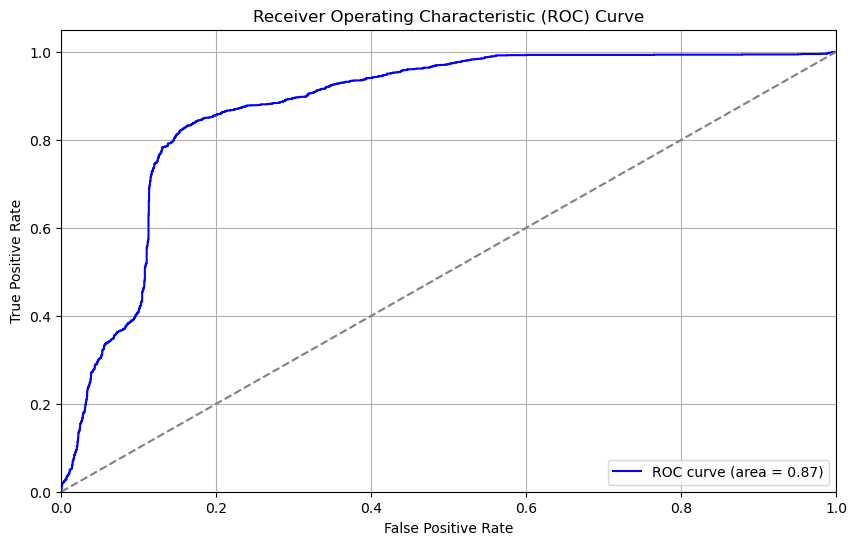

In [32]:
# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
